## Errors-in-variables estimation of specific climate sensitivity
by D. Heslop (david.heslop@anu.edu.au), E.J. Rohling, G. L. Foster, & J. Yu, submitted.

### Notebook 3 - Plot regression results
Plot results of regression analysis using the results created in Notebook 2

#### Import packages
Package requirements are provided in the accompanying ```requirements.txt``` file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import shutil

#### Test if the user has pdflatex installed for plotting 

In [2]:
if shutil.which('pdflatex') is not None:
    plt.rcParams['text.usetex'] = True

#### Set the random number generator seed to ensure repeatability

In [3]:
seed_value = 54321
np.random.seed(seed_value) #set the random number generator

#### Define the CO$_2$ radiative forcing effect 

A first-order approximation of the radiative forcing effect, $\Delta R_{\mathrm{[CO2]}}$, of CO$_2$ is (Myhre, 1998):

\begin{equation}
f_{\Delta R\mathrm{[CO2]}}(\mathrm{CO}_2) = 5.35 \log(\mathrm{CO}_2 / C_0),
\end{equation}

where $C_0$ is a reference CO$_2$ concentration. Conversion of CO$_2$ into radiative forcing is defined in the ```DeltaF_CO2``` function. 


In [4]:
def DeltaF_CO2(CO2,C0):
    
    ## INPUTS
    # CO2 = CO2 concentration
    # C0 = reference CO2 concentration

    ## OUTPUT
    # radiative forcing in W/m2
    
    return 5.35*np.log((CO2)/C0)

#### Load the time series data files

In [5]:
CO2_2ppm = np.loadtxt('CO2_2ppm.txt') #CO2 time series with 2pmm uncertainties
CO2_20ppm = np.loadtxt('CO2_20ppm.txt') #CO2 time series with 20pmm uncertainties
GMST_bin = np.loadtxt('GMST_bin.txt') #GMST time series
n_bin = np.shape(GMST_bin)[0] #number of bins

#### Evaluate the distributions of the radiative forcing effect for the synthetic CO$_2$ record
For plotting errorbars this is most easily done numerically via Monte Carlo simulation (takes a little time) 

In [6]:
RCO2_2ppm = np.zeros((n_bin,3)) #preallocate array for 2ppm output
for i in range(n_bin): #loop through the bins
    #generate 1E6 normally distributed values and convert to radiative forcing
    mc = DeltaF_CO2(np.random.randn(int(1E6))*CO2_2ppm[i,1]+CO2_2ppm[i,0],CO2_2ppm[0,0])
    RCO2_2ppm[i,:] = [np.nanpercentile(mc,16),np.mean(mc),np.nanpercentile(mc,84)] #output percentiles (~± 1 sigma)
RCO2_2ppm -= RCO2_2ppm[0,1] #subtract mean of first bin to create anomalies

#repeat the process above for the 20ppm record
RCO2_20ppm = np.zeros((n_bin,3))
for i in range(n_bin):
    mc = DeltaF_CO2(np.random.randn(int(1E6))*CO2_20ppm[i,1]+CO2_20ppm[i,0],CO2_20ppm[0,0])
    RCO2_20ppm[i,:] = [np.nanpercentile(mc,16),np.mean(mc),np.nanpercentile(mc,84)]
RCO2_20ppm -= RCO2_20ppm[0,1]

#### Estimate uncertainties from the bootstrap results for plotting the 2 ppm results

In [7]:
x0 = np.linspace(-3.2,0.5,101) #range of GMST values for plotting

# Load the regression results
pp_OLSo = np.loadtxt("CO2_2ppm_OLSo.txt") #OLSo regression coefficients
pp_OLSi = np.loadtxt("CO2_2ppm_OLSi.txt") #OLSi regression coefficients
pp_EIV = np.loadtxt("CO2_2ppm_EIV.txt") #EIV regression coefficients
niter = np.shape(pp_EIV)[0] #number of bootstrap iterations

EIV_95 = np.zeros((101,3)) #preallocate array for EIV regression results WRT x0
OLSi_95 = np.zeros((101,3)) #preallocate array for OLSi regression results WRT x0
OLSo_95 = np.zeros((101,3)) #preallocate array for OLSo regression results WRT x0

for j in range(101):
    EIV_hat = np.zeros(niter) #preallocate array for EIV distribution at a given x0
    OLSi_hat = np.zeros(niter) #preallocate array for OLSi distribution at a given x0
    OLSo_hat = np.zeros(niter) #preallocate array for OLSo distribution at a given x0
    
    for i in range(niter): #loop through bootstrap iterations
        EIV_hat[i] = pp_EIV[i,0]*x0[j]+pp_EIV[i,1] #EIV prediction for given bootstrap iteration for given x0
        OLSi_hat[i] = pp_OLSi[i,0]*x0[j]+pp_OLSi[i,1] #OLSi prediction for given bootstrap iteration for given x0
        OLSo_hat[i] = pp_OLSo[i]*x0[j] #OLSo prediction for given bootstrap iteration for given x0
        
    EIV_95[j,:] = np.percentile(EIV_hat,[2.5,50,97.5]) #95% EIV bootstrap confidence interval for given x0 
    OLSi_95[j,:] = np.percentile(OLSi_hat,[2.5,50,97.5]) #95% OLSi bootstrap confidence interval for given x0
    OLSo_95[j,:] = np.percentile(OLSo_hat,[2.5,50,97.5]) #95% OLSo bootstrap confidence interval for given x0

# place results into dictionary
res2 = {}
res2['x0'] = x0
res2['pp_OLSo'] = pp_OLSo
res2['pp_OLSi'] = pp_OLSi
res2['pp_EIV'] = pp_EIV
res2['OLSo_95'] = OLSo_95
res2['OLSi_95'] = OLSi_95
res2['EIV_95'] = EIV_95

#### Estimate uncertainties from the bootstrap results for plotting the 20 ppm results

In [8]:
# Load the regression results
pp_OLSo = np.loadtxt("CO2_20ppm_OLSo.txt") #OLSo regression coefficients
pp_OLSi = np.loadtxt("CO2_20ppm_OLSi.txt") #OLSi regression coefficients
pp_EIV = np.loadtxt("CO2_20ppm_EIV.txt") #EIV regression coefficients
niter = np.shape(pp_EIV)[0] #number of bootstrap iterations

EIV_95 = np.zeros((101,3)) #preallocate array for EIV regression results WRT x0
OLSi_95 = np.zeros((101,3)) #preallocate array for OLSi regression results WRT x0
OLSo_95 = np.zeros((101,3)) #preallocate array for OLSo regression results WRT x0

for j in range(101):
    EIV_hat = np.zeros(niter) #preallocate array for EIV distribution at a given x0
    OLSi_hat = np.zeros(niter) #preallocate array for OLSi distribution at a given x0
    OLSo_hat = np.zeros(niter) #preallocate array for OLSo distribution at a given x0
    
    for i in range(niter): #loop through bootstrap iterations
        EIV_hat[i] = pp_EIV[i,0]*x0[j]+pp_EIV[i,1] #EIV prediction for given bootstrap iteration for given x0
        OLSi_hat[i] = pp_OLSi[i,0]*x0[j]+pp_OLSi[i,1] #OLSi prediction for given bootstrap iteration for given x0
        OLSo_hat[i] = pp_OLSo[i]*x0[j] #OLSo prediction for given bootstrap iteration for given x0
        
    EIV_95[j,:] = np.percentile(EIV_hat,[2.5,50,97.5]) #95% EIV bootstrap confidence interval for given x0 
    OLSi_95[j,:] = np.percentile(OLSi_hat,[2.5,50,97.5]) #95% OLSi bootstrap confidence interval for given x0
    OLSo_95[j,:] = np.percentile(OLSo_hat,[2.5,50,97.5]) #95% OLSo bootstrap confidence interval for given x0

# place results into dictionary
res20 = {}
res20['pp_OLSi'] = pp_OLSi
res20['pp_OLSo'] = pp_OLSo
res20['pp_EIV'] = pp_EIV
res20['x0'] = x0
res20['OLSi_95'] = OLSi_95
res20['OLSo_95'] = OLSo_95
res20['EIV_95'] = EIV_95

#### Plot the results

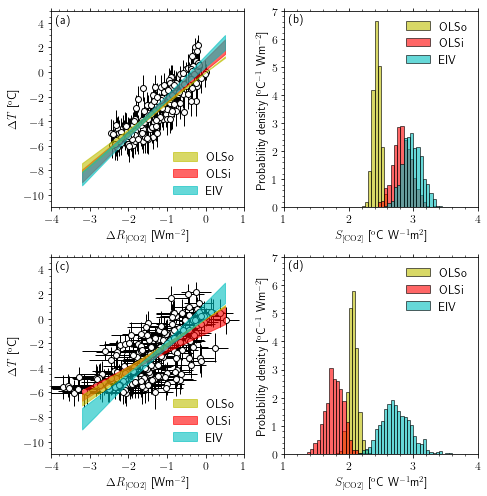

In [9]:
color = ['r','y','c'] #define color sequence for results
alpha = 0.6 #alpha level of the color fills
fontsize = 12 #fontsize for the ticklabels, etc.
fig, axs = plt.subplots(2,2,figsize=(7,7)) #create subplots
labels = ['OLSi','OLSo','EIV'] #labels to use in plot legends
bin_edges = np.arange(1, 4, 0.05) #edges of histogram bins

for ax in axs.flat: #set the labelling and ticks for each subplot 
    ax.tick_params(axis='both', labelsize=fontsize, which='both', direction='out', bottom=True, top=True)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

#define x and y variables and errors for plotting 2ppm analysis
x, xerr = RCO2_2ppm[:,1], 0.5*(RCO2_2ppm[:,2]-RCO2_2ppm[:,0])
y, yerr = GMST_bin[:,0], GMST_bin[:,1]

#plot 95% confidence intervals for 2pmm analysis
axs[0,0].errorbar(x,y,xerr=xerr, yerr=yerr, fmt='o', color='k',markerfacecolor='w',elinewidth=1,zorder=1)
axs[0,0].fill_between(res2['x0'],res2['OLSo_95'][:,2],y2=res2['OLSo_95'][:,0],zorder=3,color=color[1],alpha=alpha,label=labels[1])
axs[0,0].fill_between(res2['x0'],res2['OLSi_95'][:,2],y2=res2['OLSi_95'][:,0],zorder=2,color=color[0],alpha=alpha,label=labels[0])
axs[0,0].fill_between(res2['x0'],res2['EIV_95'][:,2],y2=res2['EIV_95'][:,0],zorder=4,color=color[2],alpha=alpha,label=labels[2])
axs[0,0].set_xlim([-4,1])
axs[0,0].set_ylim([-11,5])
axs[0,0].set_xlabel('$\Delta R_{\mathrm{[CO2]}}$ [Wm$^{-2}$]',fontsize=fontsize)
axs[0,0].set_ylabel('$\Delta T$ [$\mathrm{^o}$C]',fontsize=fontsize)
axs[0,0].legend(loc='lower right',fontsize=12,frameon=False)

#plot density functions of sensitivity for 2pmm analysis
axs[0,1].hist(res2['pp_OLSo'],bins=bin_edges,density=True,color=color[1],edgecolor='k',alpha=alpha,label=labels[1]);
axs[0,1].hist(res2['pp_OLSi'][:,0],bins=bin_edges,density=True,color=color[0],edgecolor='k',alpha=alpha,label=labels[0]);
axs[0,1].hist(res2['pp_EIV'][:,0],bins=bin_edges,density=True,color=color[2],edgecolor='k',alpha=alpha,label=labels[2]);
axs[0,1].set_xlim([1.0,4.0])
axs[0,1].set_ylim([0.0,7.0])
axs[0,1].set_xlabel('$S_{[\mathrm{CO2}]}$ [$\mathrm{^o}$C W$^{-1}$m$^{2}$]',fontsize=fontsize)
axs[0,1].set_ylabel('Probability density [$\mathrm{^o}$C$^{-1}$ Wm$^{-2}$]',fontsize=fontsize)
axs[0,1].legend(loc='upper right',fontsize=12,frameon=False)

#define x and errors for plotting 20ppm analysis
x, xerr = RCO2_20ppm[:,1], 0.5*(RCO2_20ppm[:,2]-RCO2_20ppm[:,0])
axs[1,0].errorbar(x,y,xerr=xerr, yerr=yerr, fmt='o', color='k',markerfacecolor='w',elinewidth=1,zorder=1)
axs[1,0].fill_between(res20['x0'],res20['OLSo_95'][:,2],y2=res20['OLSo_95'][:,0],zorder=3,color=color[1],alpha=alpha,label=labels[1])
axs[1,0].fill_between(res20['x0'],res20['OLSi_95'][:,2],y2=res20['OLSi_95'][:,0],zorder=2,color=color[0],alpha=alpha,label=labels[0])
axs[1,0].fill_between(res20['x0'],res20['EIV_95'][:,2],y2=res20['EIV_95'][:,0],zorder=4,color=color[2],alpha=alpha,label=labels[2])
axs[1,0].set_xlim([-4,1])
axs[1,0].set_ylim([-11,5])
axs[1,0].set_xlabel('$\Delta R_{\mathrm{[CO2]}}$ [Wm$^{-2}$]',fontsize=fontsize)
axs[1,0].set_ylabel('$\Delta T$ [$\mathrm{^o}$C]',fontsize=fontsize)
axs[1,0].legend(loc='lower right',fontsize=12,frameon=False)

#plot density functions of sensitivity for 20pmm analysis
axs[1,1].hist(res20['pp_OLSo'],bins=bin_edges,density=True,color=color[1],edgecolor='k',alpha=alpha,label=labels[1]);
axs[1,1].hist(res20['pp_OLSi'][:,0],bins=bin_edges,density=True,color=color[0],edgecolor='k',alpha=alpha,label=labels[0]);
axs[1,1].hist(res20['pp_EIV'][:,0],bins=bin_edges,density=True,color=color[2],edgecolor='k',alpha=alpha,label=labels[2]);
axs[1,1].set_xlim([1.0,4.0])
axs[1,1].set_ylim([0.0,7.0])
axs[1,1].set_xlabel('$S_{[\mathrm{CO2}]}$ [$\mathrm{^o}$C W$^{-1}$m$^{2}$]',fontsize=fontsize)
axs[1,1].set_ylabel('Probability density [$\mathrm{^o}$C$^{-1}$ Wm$^{-2}$]',fontsize=fontsize)
axs[1,1].legend(loc='upper right',fontsize=12,frameon=False)

#add subplot labels
axs[0,0].text(-3.9,4,'(a)',fontsize=fontsize)
axs[0,1].text(1.05,6.6,'(b)',fontsize=fontsize)
axs[1,0].text(-3.9,4,'(c)',fontsize=fontsize)
axs[1,1].text(1.05,6.6,'(d)',fontsize=fontsize)

plt.tight_layout()
plt.savefig("Figure5.pdf")

#### Bootstrap sensitivity results to estimate the bias in the OLSo approach

In [10]:
nbs = 5000 #number of bootstraps to use 
bias_OLSo = np.zeros(nbs) #preallocate array to store OLSo result
bias_OLSi = np.zeros(nbs) #preallocate array to store OLSi result
bias_EIV = np.zeros(nbs) #preallocate array to store EIV result

for i in range(nbs): 
    abar = np.mean(np.random.choice(res2['pp_OLSo'], size=niter, replace=True)) #mean of OLSo 2ppm bootstrap sample
    bbar = np.mean(np.random.choice(res20['pp_OLSo'], size=niter, replace=True)) #mean of OLSo 20ppm bootstrap sample
    bias_OLSo[i] = bbar-abar #difference between means is an estimate of the OLSo bias
    
    abar = np.mean(np.random.choice(res2['pp_OLSi'][:,0], size=niter, replace=True)) #mean of OLSi 2ppm bootstrap sample
    bbar = np.mean(np.random.choice(res20['pp_OLSi'][:,0], size=niter, replace=True)) #mean of OLSi 20ppm bootstrap sample
    bias_OLSi[i] = bbar-abar #difference between means is an estimate of the OLSi bias
   
    abar = np.mean(np.random.choice(res2['pp_EIV'][:,0], size=niter, replace=True)) #mean of EIV 2ppm bootstrap sample
    bbar = np.mean(np.random.choice(res20['pp_EIV'][:,0], size=niter, replace=True)) #mean of EIV 20ppm bootstrap sample
    bias_EIV[i] = bbar-abar #difference between means is an estimate of the EIV bias

#### Combine the bias estimates into a single plot

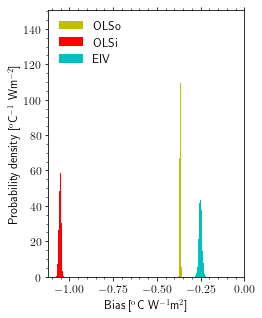

In [11]:
fontsize = 12
fig, axs = plt.subplots(figsize=(95/25.4,115/25.4)) #create a plot 
axs.tick_params(axis='both', labelsize=fontsize, which='both', direction='out', bottom=True, top=True)
axs.minorticks_on() #switch on minor ticks
axs.xaxis.set_minor_locator(AutoMinorLocator()) #position minor x-ticks
axs.yaxis.set_minor_locator(AutoMinorLocator()) #position minor y-ticks
axs.hist(bias_OLSo,bins=21,density=True,facecolor=color[1],label=labels[1],edgecolor=None); #histogram of OLSo biases
axs.hist(bias_OLSi,bins=21,density=True,facecolor=color[0],label=labels[0],edgecolor=None); #histogram of OLSi biases
axs.hist(bias_EIV,bins=21,density=True,facecolor=color[2],label=labels[2],edgecolor=None); #histogram of EIV biases
axs.set_xlabel(r'Bias [$\mathrm{^o}$C W$^{-1}$m$^{2}$]',fontsize=fontsize) #label the x-axis
axs.set_ylabel(r'Probability density [$\mathrm{^o}$C$^{-1}$ Wm$^{-2}$]',fontsize=fontsize) #label the y-axis
axs.legend(loc='upper left',fontsize=fontsize,frameon=False) #add a legend
axs.set_xlim(xmax=0); #set the maximum x-value

plt.tight_layout()
plt.savefig("Figure6.pdf")